In [1]:
import pandas as pd
df = pd.read_csv("E-commerce.csv")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [2]:
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df)
scaler = StandardScaler()
scaler.fit(df)
df

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Gender_Female,Gender_Male,City_Chicago,...,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,101,29,1120.20,14,4.6,True,25,True,False,False,...,False,False,True,False,False,True,False,False,True,False
1,102,34,780.50,11,4.1,False,18,False,True,False,...,True,False,False,False,False,False,True,True,False,False
2,103,43,510.75,9,3.4,True,42,True,False,True,...,False,False,False,False,True,False,False,False,False,True
3,104,30,1480.30,19,4.7,False,12,False,True,False,...,False,False,False,True,False,True,False,False,True,False
4,105,27,720.40,13,4.0,True,55,False,True,False,...,False,True,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,446,32,660.30,10,3.8,True,42,False,True,False,...,False,True,False,False,False,False,True,False,False,True
346,447,36,470.50,8,3.0,False,27,True,False,False,...,False,False,False,False,True,False,False,True,False,False
347,448,30,1190.80,16,4.5,True,28,True,False,False,...,False,False,True,False,False,True,False,False,True,False
348,449,34,780.20,11,4.2,False,21,False,True,False,...,True,False,False,False,False,False,True,True,False,False


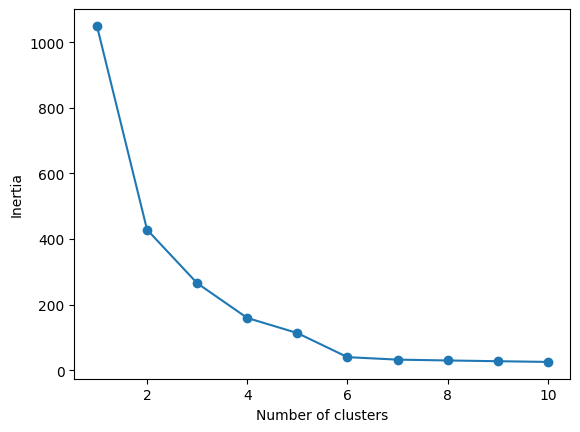

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

your_features = df[['Total Spend', 'Items Purchased', 'Days Since Last Purchase']]
your_features = scaler.fit_transform(your_features)

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(your_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [4]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(your_features)

score = silhouette_score(your_features, clusters)
print("Silhouette Score for k=6: ", score)


Silhouette Score for k=6:  0.7030795117946509


In [5]:
df['Cluster'] = clusters
cluster_summary = df.groupby('Cluster').agg("mean").reset_index()
cluster_summary

,Cluster,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Gender_Female,Gender_Male,...,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver,Satisfaction Level_Neutral,Satisfaction Level_Satisfied,Satisfaction Level_Unsatisfied
0,0,276.568966,36.706897,446.894828,7.568966,3.193103,0.0,22.758621,1.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.965517,0.000000,0.0
1,1,274.576271,30.711864,1165.035593,15.271186,4.544068,1.0,24.593220,0.983051,0.016949,...,0.0,0.000000,1.0,0.0,0.000000,1.0,0.000000,0.000000,1.000000,0.0
2,2,274.568966,29.120690,1459.772414,20.000000,4.808621,0.0,11.172414,0.000000,1.000000,...,0.0,0.000000,0.0,1.0,0.000000,1.0,0.000000,0.000000,1.000000,0.0
3,3,267.470588,26.794118,703.688235,12.764706,4.017647,1.0,53.176471,0.029412,0.970588,...,0.0,1.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.000000,1.0
4,4,279.341463,39.085366,550.126829,9.597561,3.557317,1.0,38.756098,0.707317,0.292683,...,0.0,0.292683,0.0,0.0,0.707317,0.0,0.292683,0.000000,0.000000,1.0
5,5,275.576271,34.118644,805.491525,11.677966,4.172881,0.0,15.271186,0.000000,1.000000,...,1.0,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.864407,0.135593,0.0


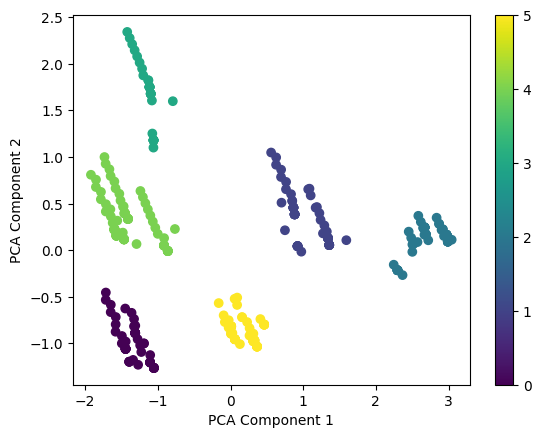

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(your_features)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()